# Rf 7 0 4_Amplitudefit
Speecial p.d.f.'s: using a p.d.f defined by a sum of real-valued amplitude components



**Author:** 07/2008 - Wouter Verkerke  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:02 AM.</small></i>

In [1]:
%%cpp -d
#include "RooRealVar.h"
#include "RooDataSet.h"
#include "RooGaussian.h"
#include "RooConstVar.h"
#include "RooTruthModel.h"
#include "RooFormulaVar.h"
#include "RooRealSumPdf.h"
#include "RooPolyVar.h"
#include "RooProduct.h"
#include "TH1.h"
#include "TCanvas.h"
#include "TAxis.h"
#include "RooPlot.h"

In [2]:
%%cpp -d
// This is a workaround to make sure the namespace is used inside functions
using namespace RooFit;

Setup 2d amplitude functions
 -------------------------------------------------------

Observables

In [3]:
RooRealVar t("t", "time", -1., 15.);
RooRealVar cosa("cosa", "cos(alpha)", -1., 1.);


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Use rootruthmodel to obtain compiled implementation of sinh/cosh modulated decay functions

In [4]:
RooRealVar tau("tau", "#tau", 1.5);
RooRealVar deltaGamma("deltaGamma", "deltaGamma", 0.3);
RooTruthModel truthModel("tm", "tm", t);
RooFormulaVar coshGBasis("coshGBasis", "exp(-@0/ @1)*cosh(@0*@2/2)", RooArgList(t, tau, deltaGamma));
RooFormulaVar sinhGBasis("sinhGBasis", "exp(-@0/ @1)*sinh(@0*@2/2)", RooArgList(t, tau, deltaGamma));
RooAbsReal *coshGConv = truthModel.convolution(&coshGBasis, &t);
RooAbsReal *sinhGConv = truthModel.convolution(&sinhGBasis, &t);

Construct polynomial amplitudes in cos(a)

In [5]:
RooPolyVar poly1("poly1", "poly1", cosa, RooArgList(RooConst(0.5), RooConst(0.2), RooConst(0.2)), 0);
RooPolyVar poly2("poly2", "poly2", cosa, RooArgList(RooConst(1), RooConst(-0.2), RooConst(3)), 0);

Construct 2d amplitude as uncorrelated product of amp(t)*amp(cosa)

In [6]:
RooProduct ampl1("ampl1", "amplitude 1", RooArgSet(poly1, *coshGConv));
RooProduct ampl2("ampl2", "amplitude 2", RooArgSet(poly2, *sinhGConv));

Construct amplitude sum pdf
 -----------------------------------------------------

Amplitude strengths

In [7]:
RooRealVar f1("f1", "f1", 1, 0, 2);
RooRealVar f2("f2", "f2", 0.5, 0, 2);

Construct pdf

In [8]:
RooRealSumPdf pdf("pdf", "pdf", RooArgList(ampl1, ampl2), RooArgList(f1, f2));

Generate some toy data from pdf

In [9]:
RooDataSet *data = pdf.generate(RooArgSet(t, cosa), 10000);

[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)


Fit pdf to toy data with only amplitude strength floating

In [10]:
pdf.fitTo(*data);

[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (ampl1,ampl2)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 f1           1.00000e+00  2.00000e-01    0.00000e+00  2.00000e+00
     2 f2           5.00000e-01  2.00000e-01    0.00000e+00  2.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 ****

Plot amplitude sum pdf
 -------------------------------------------

Make 2d plots of amplitudes

In [11]:
TH1 *hh_cos = ampl1.createHistogram("hh_cos", t, Binning(50), YVar(cosa, Binning(50)));
TH1 *hh_sin = ampl2.createHistogram("hh_sin", t, Binning(50), YVar(cosa, Binning(50)));
hh_cos->SetLineColor(kBlue);
hh_sin->SetLineColor(kRed);

[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(ampl1) WARNING extended mode requested for a non-pdf object, ignored
[#0] WARNING:InputArguments -- RooAbsReal::createHistogram(ampl2) WARNING extended mode requested for a non-pdf object, ignored


Make projection on t, plot data, pdf and its components
 Note component projections may be larger than sum because amplitudes can be negative

In [12]:
RooPlot *frame1 = t.frame();
data->plotOn(frame1);
pdf.plotOn(frame1);
pdf.plotOn(frame1, Components(ampl1), LineStyle(kDashed));
pdf.plotOn(frame1, Components(ampl2), LineStyle(kDashed), LineColor(kRed));

[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on t integrates over variables (cosa)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) directly selected PDF components: (ampl1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) indirectly selected PDF components: (poly1,tm_conv_coshGBasis_[t],coshGBasis)
[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on t integrates over variables (cosa)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:Plotting -- RooAbs

Make projection on cosa, plot data, pdf and its components
 Note that components projection may be larger than sum because amplitudes can be negative

In [13]:
RooPlot *frame2 = cosa.frame();
data->plotOn(frame2);
pdf.plotOn(frame2);
pdf.plotOn(frame2, Components(ampl1), LineStyle(kDashed));
pdf.plotOn(frame2, Components(ampl2), LineStyle(kDashed), LineColor(kRed));

TCanvas *c = new TCanvas("rf704_amplitudefit", "rf704_amplitudefit", 800, 800);
c->Divide(2, 2);
c->cd(1);
gPad->SetLeftMargin(0.15);
frame1->GetYaxis()->SetTitleOffset(1.4);
frame1->Draw();
c->cd(2);
gPad->SetLeftMargin(0.15);
frame2->GetYaxis()->SetTitleOffset(1.4);
frame2->Draw();
c->cd(3);
gPad->SetLeftMargin(0.20);
hh_cos->GetZaxis()->SetTitleOffset(2.3);
hh_cos->Draw("surf");
c->cd(4);
gPad->SetLeftMargin(0.20);
hh_sin->GetZaxis()->SetTitleOffset(2.3);
hh_sin->Draw("surf");

[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on cosa integrates over variables (t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_coshGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(tm_conv_sinhGBasis_[t]_Int[t]) using numeric integrator RooIntegrator1D to calculate Int(t)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) directly selected PDF components: (ampl1)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(pdf) indirectly selected PDF components: (poly1,tm_conv_coshGBasis_[t],coshGBasis)
[#1] INFO:Plotting -- RooAbsReal::plotOn(pdf) plot on cosa integrates over variables (t)
[#1] INFO:NumericIntegration

Draw all canvases 

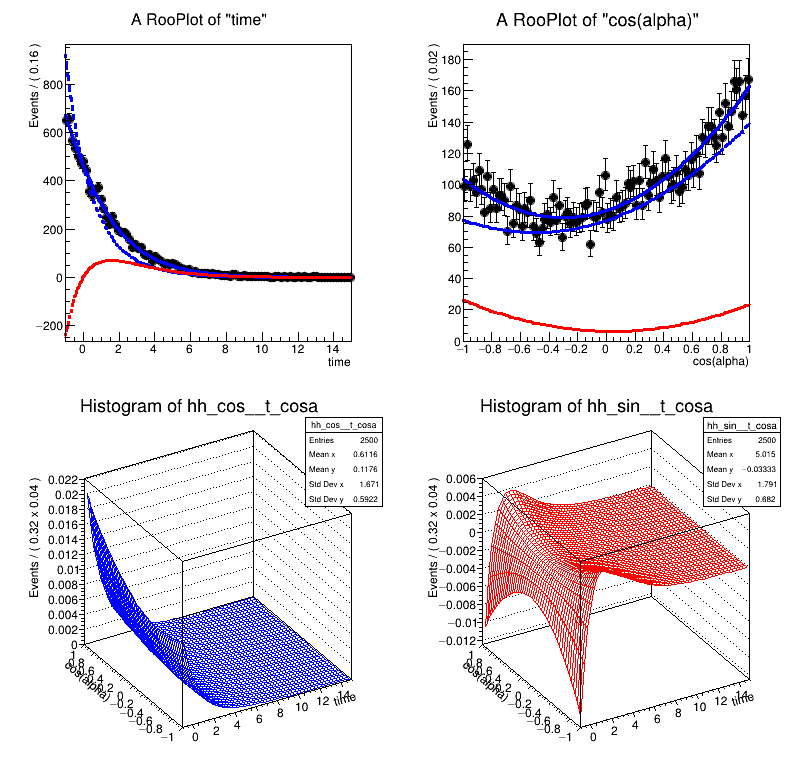

In [14]:
gROOT->GetListOfCanvases()->Draw()